In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [20]:
# load the metadata
metadata_df = pd.read_csv("metadata.csv")
title_embeddings = np.load("metadata_title_embeddings.npz")["embeddings"]
keywords_embeddings = np.load("metadata_keywords_embeddings.npz")["embeddings"]

In [21]:
# Setting index
metadata_df.set_index("filename", inplace=True)
metadata_df.head(2)


keywords  freesound_id  \
filename                                                                      
617030.mp3  atmosphere, general-noise, suburban, ambiance,...        617030   
637408.mp3                jackhammer, construction, reflected        637408   

                                                   sound_link manufacturer  \
filename                                                                     
617030.mp3  https://freesound.org/people/klankbeeld/sounds...   klankbeeld   
637408.mp3  https://freesound.org/people/kyles/sounds/637408/        kyles   

                                                      license  \
filename                                                        
617030.mp3       https://creativecommons.org/licenses/by/4.0/   
637408.mp3  http://creativecommons.org/publicdomain/zero/1.0/   

                                              title  \
filename                                              
617030.mp3   suburb night NL 1041PM 210415_0279.wav   
637408.mp3  construction jackhammer reflected5.flac   

                                                  description  num_downloads  \
filename                                                                       
617030.mp3  Night in a suburban city.  All sounds far. Tra...             65   
637408.mp3  construction jackhammer reflected5\n\nrecorded...             23   

                                 geotag  start_time_s  end_time_s  
filename                                                           
617030.mp3  51.7090740261 5.30657821347          15.6      43.535  
637408.mp3                          NaN         209.8     232.356

## metadata_df General look

In [22]:
##  Shape of Data Frame
print("    Shape of Data Frame:")
print("DataFrame shape: \t", metadata_df.shape)
print("DataFrame rows: \t", len(metadata_df.index))
print("DataFrame columns: \t", len(metadata_df.columns))
print("DataFrame column names: \n", metadata_df.columns.to_list())

# # select a column
# metadata['keywords']
# metadata.loc[:, 'keywords']
# metadata[['title', 'keywords']]

# # select a row
# metadata.loc['450016.mp3']
# metadata.loc[['438858.mp3', '128446.mp3'], ["title", "manufacturer"]]

#select a row based on a condition
# (metadata['manufacturer'] == 'FullMetalJedi').head(n=3)


    Shape of Data Frame:
DataFrame shape: 	 (9026, 11)
DataFrame rows: 	 9026
DataFrame columns: 	 11
DataFrame column names: 
 ['keywords', 'freesound_id', 'sound_link', 'manufacturer', 'license', 'title', 'description', 'num_downloads', 'geotag', 'start_time_s', 'end_time_s']


## Annotations file

In [23]:
annotations = pd.read_csv("annotations.csv")
# making duration column
# annotations["duartion"] = annotations["offset"] - annotations["onset"]
annotations.head(1)


task_id    filename                                          annotator  \
0  161977861  560761.mp3  5945971035380930099053858595454362549806990533...   

                                               text      onset     offset  \
0  bird twitters nearby with a high pitch two times  16.552368  17.271435   

                      filename_unsafe  
0  560761_tufted titmouse calling.mp3

In [24]:
print("    Shape of annotation:")
print("DataFrame shape: \t", annotations.shape)
print("DataFrame rows: \t", len(annotations.index))
print("DataFrame columns: \t", len(annotations.columns))
print("DataFrame column names: \n", annotations.columns.to_list())

# num annotaors for each audio recording
num_annotators = annotations.groupby("filename")["annotator"].nunique()
print(f'\n number of Annotators (each one annotatd many times): {len(num_annotators)}')  

    Shape of annotation:
DataFrame shape: 	 (35826, 7)
DataFrame rows: 	 35826
DataFrame columns: 	 7
DataFrame column names: 
 ['task_id', 'filename', 'annotator', 'text', 'onset', 'offset', 'filename_unsafe']

 number of Annotators (each one annotatd many times): 9026


In [25]:
# # filtering files with more than 1 annotator
# multi_annotators = num_annotators[num_annotators > 1]
# print(f'number of Annotators (each one annotatd many times): {len(multi_annotators)}')

# # Filter metadata_df and annotations using multi_annotators
# filtered_metadata = metadata_df.loc[multi_annotators]
# filtered_annotations = annotations[annotations["filename"].isin(multi_annotators)]






## 2. Annotation Quality

## Use the complete data set (or a subset) to address the following points quantitatively.

(a) How many annotations did we collect per file? \
    How many distinct sound events per file?

In [26]:
# annotation count per task/file
annotation_counts = annotations["task_id"].value_counts()
print("Min: ", annotation_counts.min())
print("Max: ", annotation_counts.max())
print("Mean: ", annotation_counts.mean())
print("Median: ", annotation_counts.median())



# ANSWER
"""- max annotation count is 96 per file, min is 1, the mean is ~ 4,
 But most files have 2-7 annotations (more density in this range).
- I took a look at 10 samples... --> most events had 1-4 different sound events."""

Min:  1
Max:  96
Mean:  3.9692000886328387
Median:  2.0


'- max annotation count is 96 per file, min is 1, the mean is ~ 4,\n But most files have 2-7 annotations (more density in this range).\n- I took a look at 10 samples... --> most events had 1-4 different sound events.'

##  (b) How detailed are the text annotations? How much does the quality of annotations vary between different annotators?

In [27]:
"""
Took 10 samples.
Created 10 lists of annotation of 10 different files.
"""

# first group the data by filename
grouped_by_filename = annotations.groupby("filename")

# get 10 random filenames from the grouped data
subset_filenames = list(grouped_by_filename.groups.keys())[100:110]

#loop over each group of each file and get the annotations in lists
annotations_list = []
for filename in subset_filenames:
    annotations_list.append(grouped_by_filename.get_group(filename)["text"].to_list())
# print the annotations for each file
for i, filename in enumerate(subset_filenames):
    print(f"Annotations for {filename}:")
    for j, annotation in enumerate(annotations_list[i]):
        print(f"{j + 1}: {annotation}")
    print("\n")


Annotations for 109434.mp3:
1: A loud police-siren goes on and off in a rhythmic pattern neither fading nor increasing.


Annotations for 109793.mp3:
1: A string instrument gets very deep note plucked with long decay


Annotations for 110129.mp3:
1: sound of a bus engine


Annotations for 110133.mp3:
1: continuous alarm of a cardreader next to a door, repeated sound with 500 milliseconds beep and 500 ms pause


Annotations for 110210.mp3:
1: A person close-by laughing in a lobby.
2: A baby repeatedly and faintly crying in a lobby
3: A baby faintly repeatedly crying in a lobby
4: A clear and very loud cry from a child in a lowly crouded lobby.


Annotations for 110219.mp3:
1: brass band playing continuously
2: brass band playing continuously


Annotations for 110260.mp3:
1: Rhythmic trumpets are heard clearly, their bright, brassy sound cutting through the air with a lively and energetic tune.
2: Rhythmic trumpets are heard clearly, their bright, brassy sound cutting through the air wit

In [28]:
# second_file = annotations.loc["127606.mp3"]
# num_annotators = second_file["annotator"].nunique()

# print(f'WE have ({len(second_file)}) annotations from ({num_annotators}) annotators for 127606.mp3')

# num_annotators = second_file["annotator"].nunique()
# print(f'WE have ({num_annotators}) annotators for 127606.mp3')

# annotations_2nd_file = second_file["text"].to_list()
# for ann in annotations_2nd_file: #print the annotations
#     print(ann)

# second_file.head(1)


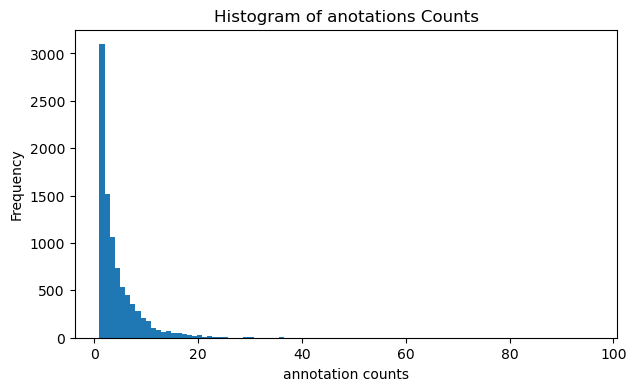

In [29]:
plt.title("Histogram of anotations Counts")
annotation_counts.plot.hist(bins=annotation_counts.max(), figsize=(7, 4))
plt.xlabel("annotation counts")
plt.show()
# # another plot with zoom on x-axis
# plt.title("ZOOM Histogram of anotations Counts")
# annotation_counts.plot.hist(bins=annotation_counts.max(), figsize=(7, 4))
# plt.xlim(0, 20)
# plt.xlabel("annotation counts")
# plt.show()


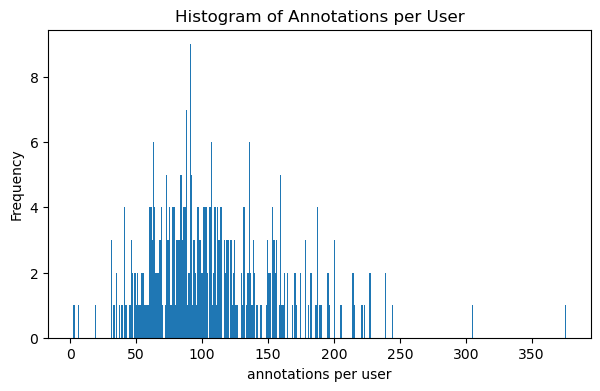

In [30]:
# group by number of annotations that each user did for each task/file
annotations_per_user = annotations.groupby("annotator")["task_id"].count()
annotations_per_user 
# plot
plt.title("Histogram of Annotations per User")
annotations_per_user.plot.hist(bins=annotations_per_user.max(), figsize=(7, 4))
plt.xlabel("annotations per user")
plt.show()


In [31]:
annotations = pd.read_csv("annotations.csv")
annotations[["filename","text"]].head(20)

filename                                               text
0   560761.mp3   bird twitters nearby with a high pitch two times
1   240538.mp3                     A cow bell clinging repeatedly
2   660337.mp3          A child speaks with a high-pitched voice 
3   725686.mp3             A high pitch meowing coming from a cat
4    97606.mp3  An extremely loud brushing sound on a construc...
5   707789.mp3                           licking and eating sound
6   501826.mp3  A powerful cymbal crash with a bright, metalli...
7   141704.mp3                   crowd of people howling in arena
8   463807.mp3                                Multiple ship horns
9   570488.mp3  An alarm siren sounding outdoors under windy c...
10  147543.mp3            woman laughing loudly, fading, indoor. 
11   56696.mp3             A man talking loudly in the background
12  116485.mp3                        A dog is barking furiously.
13  690473.mp3                                    birds chirping 
14  365961.mp3  A man speaking in a deep, elongated voice with...
15  384475.mp3                           loud urban traffic noise
16  616812.mp3                        Someone hammering on stones
17  693427.mp3                        A faint deep rumbling noise
18  569159.mp3                          A fly flying loudly close
19   69212.mp3                            A car door opens nearby

In [32]:
duplicates = annotations.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
annotations[duplicates].head(10)


Number of duplicate rows: 141


task_id    filename  \
1212   161978343  729186.mp3   
3700   161976781  159322.mp3   
4159   161977676  394707.mp3   
6823   161978343  729186.mp3   
6828   161984876  482337.mp3   
8267   161983957  124678.mp3   
8581   161976946   98007.mp3   
8783   161978452  629649.mp3   
9588   161978486  116483.mp3   
10018  161978488  116485.mp3   

                                               annotator  \
1212   5560510890581392803743942761910818323546111204...   
3700   8926896165619677042001572601386787190420972763...   
4159   7199917567709710204485192252039334277832060890...   
6823   5560510890581392803743942761910818323546111204...   
6828   3687879004483607437843305961928520180301694036...   
8267   1000854762852742563558281041488243758990786435...   
8581   7526205831694568980367141074683662123375335303...   
8783   2511836030875594054249018396648810123064624225...   
9588   1847409964593900791579168861090982009818939233...   
10018  2999735693560213149163242311436710771999021040...   

                                                    text      onset  \
1212   A kitten meows very protractedly one time clos...  14.616757   
3700   Noisy, textured beep with a grainy edge, blend...   0.907811   
4159                    A flok of birds singing outside.   0.000000   
6823      A ball kicking the ground one time, distantly.   0.000000   
6828   People talking loudly in a constant pattern in...  18.182063   
8267                                  a child is meowing  10.685926   
8581   start race bleeps, first 3 repeated low pitche...  18.292501   
8783                               metal gate screeching  14.602927   
9588                 A short, sharp, high-pitched bark.    0.075945   
10018                        A dog is barking furiously.   9.054397   

          offset                                    filename_unsafe  
1212   15.798844                   729186_Young_Kitty_Meowing 3.mp3  
3700    1.347075           159322_dont you tell me - beeps 2wav.mp3  
4159   23.668390  394707_170527_0032 dawsholm park with jesswav.mp3  
6823    0.339207                   729186_Young_Kitty_Meowing 3.mp3  
6828   20.676553           482337_Conversation in Class roomwav.mp3  
8267   11.929870  124678_noise doesnt exist_sound workshops_1607...  
8581   22.090152                  98007_Start race bleeps  2wav.mp3  
8783   17.754497                        629649_Screeching metal.mp3  
9588    0.655022                    116483_DogBarkPapillon01wav.mp3  
10018   9.800053                    116485_DogBarkPapillon03wav.mp3

In [33]:
print(annotations.info())
print(annotations.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35826 entries, 0 to 35825
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   task_id          35826 non-null  int64  
 1   filename         35826 non-null  object 
 2   annotator        35826 non-null  object 
 3   text             35826 non-null  object 
 4   onset            35826 non-null  float64
 5   offset           35826 non-null  float64
 6   filename_unsafe  35826 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.9+ MB
None
            task_id         onset        offset
count  3.582600e+04  35826.000000  35826.000000
mean   1.619836e+08      7.519307     14.833223
std    4.744002e+03      7.580258      8.018508
min    1.619765e+08      0.000000      0.088519
25%    1.619792e+08      0.029315      7.992713
50%    1.619837e+08      5.619811     15.470293
75%    1.619872e+08     13.266922     21.105678
max    1.621615e+08     29.

## Annotattion Quality
\
(a) How precise are the temporal annotations?

- The annotations are precise in generall (by taking look into subset)

(b) How similar are the text annotations that correspond to the same region?

- same files tend to have the same meaning for the corresponding parts of audio.

 Use the complete data set (or a subset) to address the following points quantitatively.

(a) How many annotations did we collect per file? How many distinct sound events per file?

- max annotation count is 96 per file, min is 1, the mean is 4, But most files have 2-7 annotations (more density in this range).
- I took a look at 10 samples... --> most events had 1-4 different sound events.

 (b) How detailed are the text annotations? How much does the quality of annotations vary between
 different annotators?

 - Most text annotations have adjectives describing the sound and the closeness of it (background, in distance....) which follows the annoting criteria.
 - In General, annotaters gave good & complete sentences as spesified in task 1. There were, of course, some annotations with lower quality (less describing words) but still correct description. 

 (c) Are there any obvious inconsistencies, outliers, or poor-quality annotations in the data? Propose a simple method to filter or fix incorrect or poor-quality annotations (e.g., remove outliers, typos, or
 spelling errors).

 - The data seems to be clean with no outliers or poor-quality annotations
 - However, there should be some methods to filter the data
 - Method could be : Algorithm that checks if some sentences have same meaning (Natural language Processing - NLP)
 . In addition, remove null values/ typos /duplicats, remove onset at 29 because this is the end of audio and annotations that looks unlogical or meaningless

## 3. Audio Features:

## A- Which audio features appear useful? Select only the most relevant ones or perform a down projection for the next steps.

We selected MFCCs (Mel-Frequency Cepstral Coefficients) as the most relevant audio feature based on domain knowledge and their strong performance in sound event detection. Among the provided features (e.g., MFCC, logmelspectrogram, zerocrossingrate), MFCCs best represent human auditory perception and balance frequency and energy information effectively. To create fixed-length vectors, we averaged the MFCC feature matrix over time within each annotated and silent region. Afterwards, we used PCA to reduce the dimensionality of these vectors to two components for visualization and clustering.


## B-Extract a fixed-length feature vector for each annotated region as well as for all the silent parts in between. The most straightforward way to do this is to average the audio features of the corresponding region over time, as shown in the tutorial session.

For each of the 15 most information-rich audio files, we extracted MFCC features from both annotated sound regions and the silent regions in between. To convert each variable-length region into a fixed-length vector, we computed the average of all MFCC frames within that region. We applied the same process for silent regions, enabling a uniform feature representation across all segments.

## C-Cluster the audio features for the extracted regions. Can you identify meaningful clusters of audio features? Do the feature vectors of the silent regions predominantly fall into one large cluster?

We applied PCA to reduce the dimensionality of the audio features to 2D, followed by KMeans clustering (k=5) to analyze structural differences. As shown in the figure, annotated sound events (blue) and silent segments (gray) formed visibly distinct clusters. While some overlap exists, silent regions tend to cluster more tightly, reflecting their lower variability and energy, while annotated regions are more scattered, reflecting the diversity of audio events. This suggests that the extracted features are informative and can potentially support automated sound event detection.


The clustering results suggest that annotated audio events and silence exhibit different distributions in the feature space. This supports the usefulness of MFCCs and validates our methodology for further model training in future project stages.







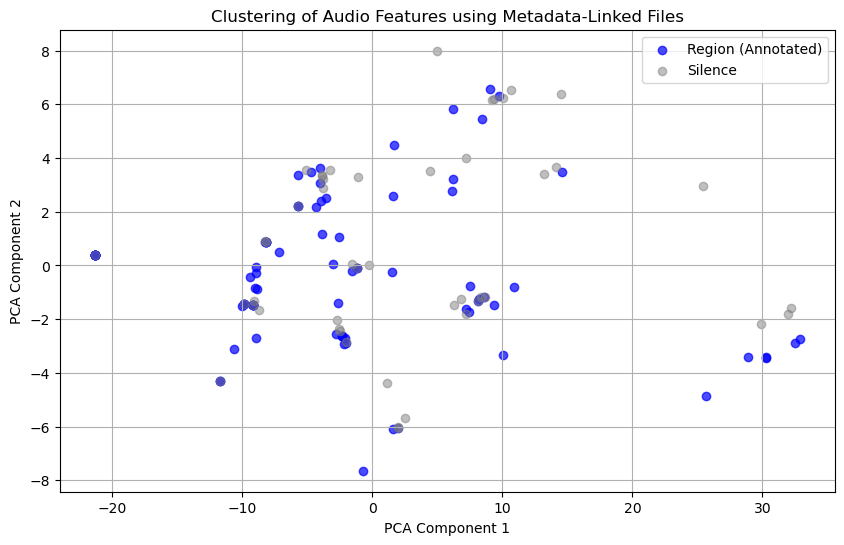

# Exercise 4

Text Features (6 points): Load and analyze the text features of the annotations
(file: annotations text embeddings.npy):

(a) Cluster the text features. Can you find meaningful clusters?

(b) Design a labeling function1 for classes dog and cat. Do the annotations labeled as dog or cat sounds
form tight clusters in the text and audio feature space?

(c) How well do the audio feature clusters align with text clusters?

## a) Cluster text feature

In [34]:
text_embeddings_npz = np.load("annotations_text_embeddings.npz")
print("Keys in npz file:", text_embeddings_npz.files)

text_embeddings = text_embeddings_npz["embeddings"]
print("Shape of text embeddings:", text_embeddings.shape)

Keys in npz file: ['embeddings']
Shape of text embeddings: (35826, 1024)


In [35]:
import sklearn
print(sklearn.__version__)

1.6.1


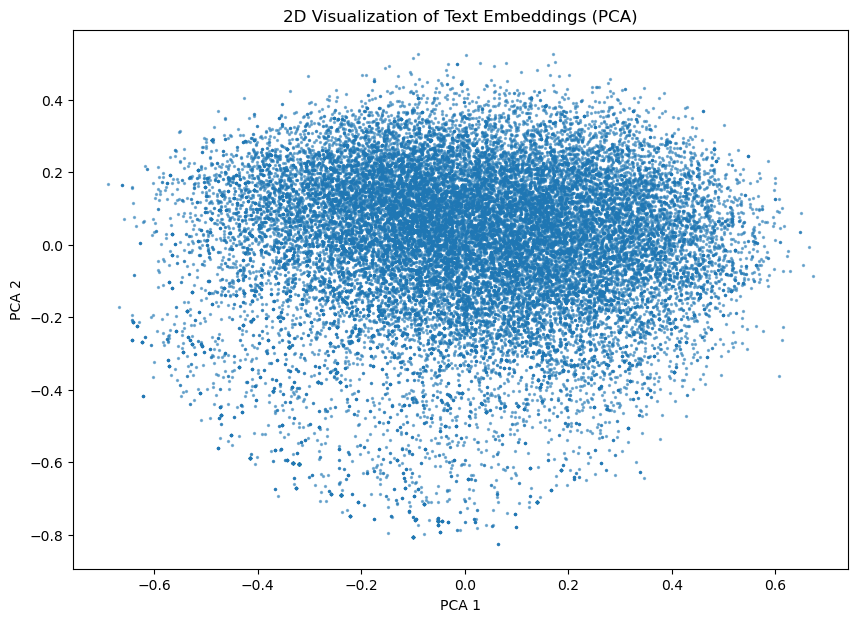

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D with PCA (fast!)
pca = PCA(n_components=2)
text_embeddings_2d = pca.fit_transform(text_embeddings)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(text_embeddings_2d[:, 0], text_embeddings_2d[:, 1], s=2, alpha=0.5)
plt.title("2D Visualization of Text Embeddings (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

3 cluster


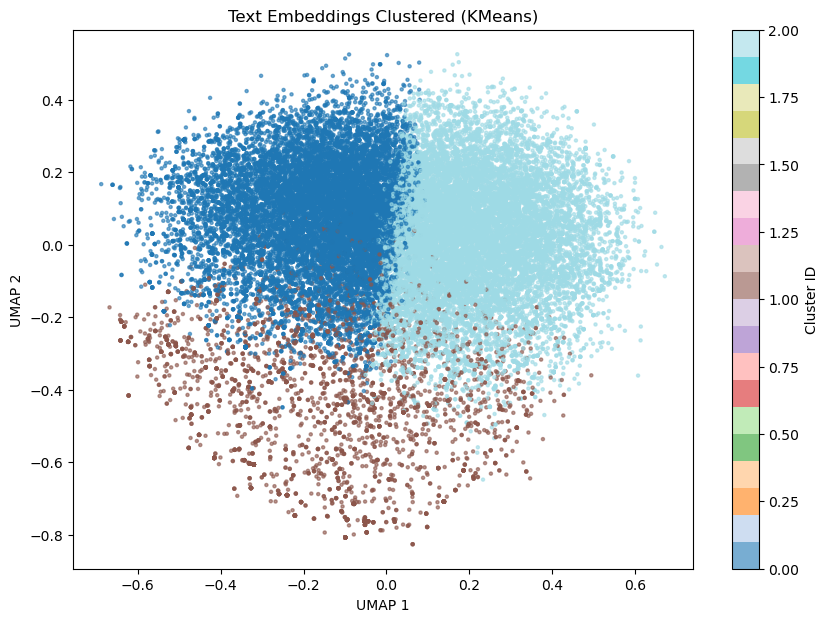

4 cluster


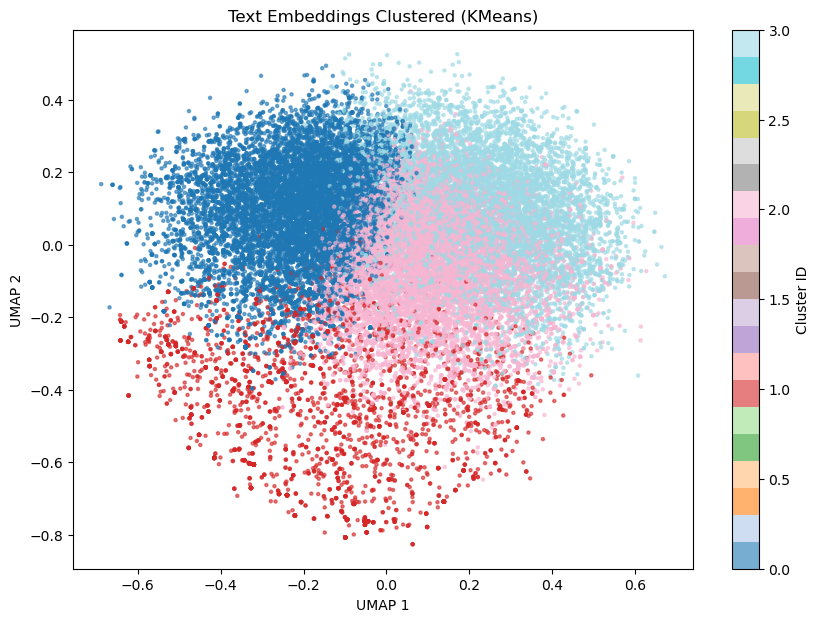

5 cluster


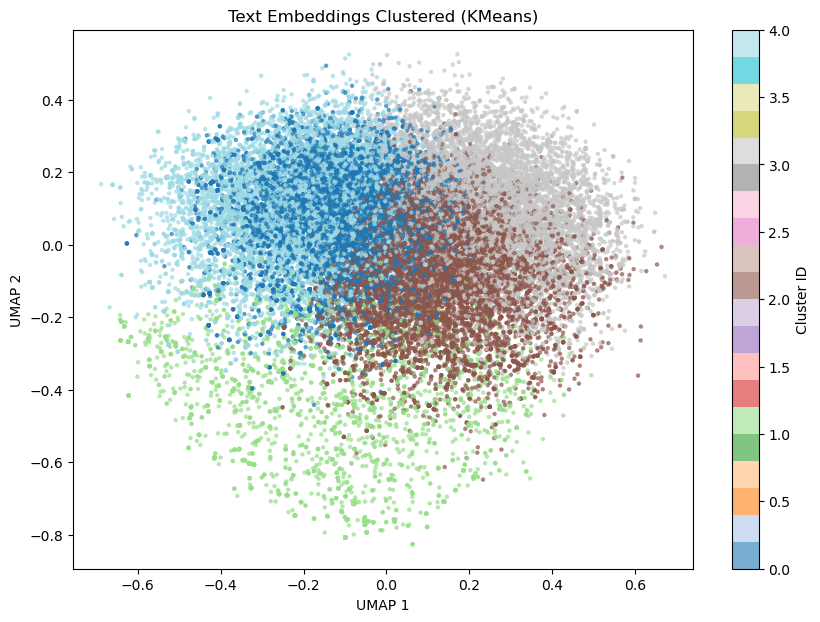

10 cluster


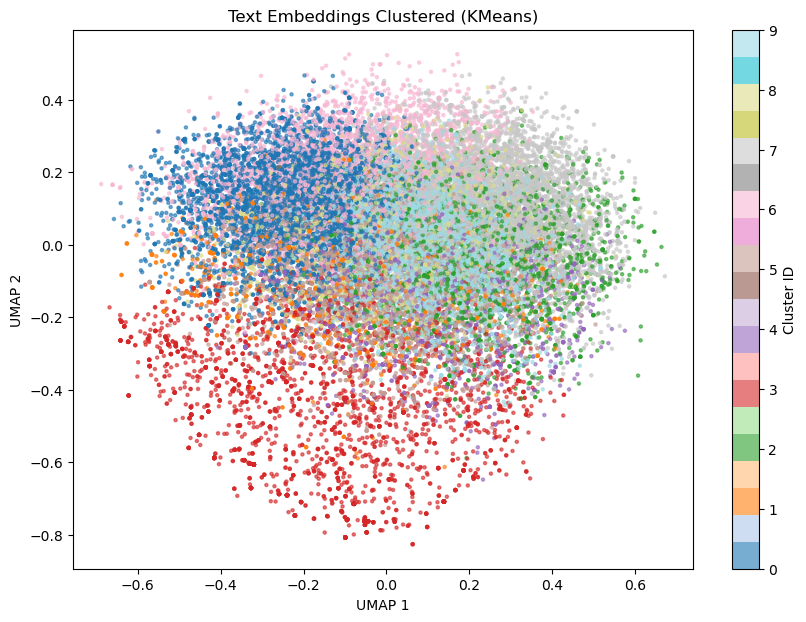

15 cluster


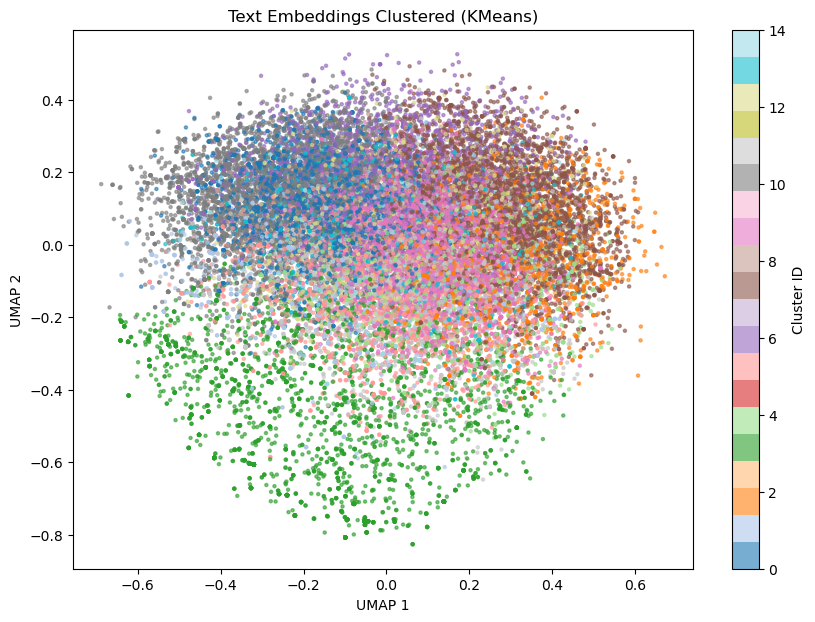

20 cluster


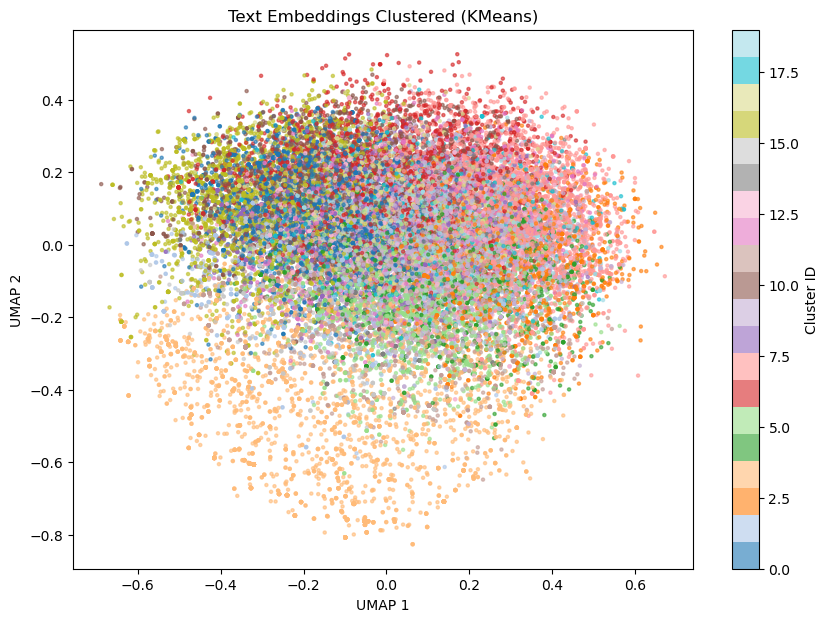

50 cluster


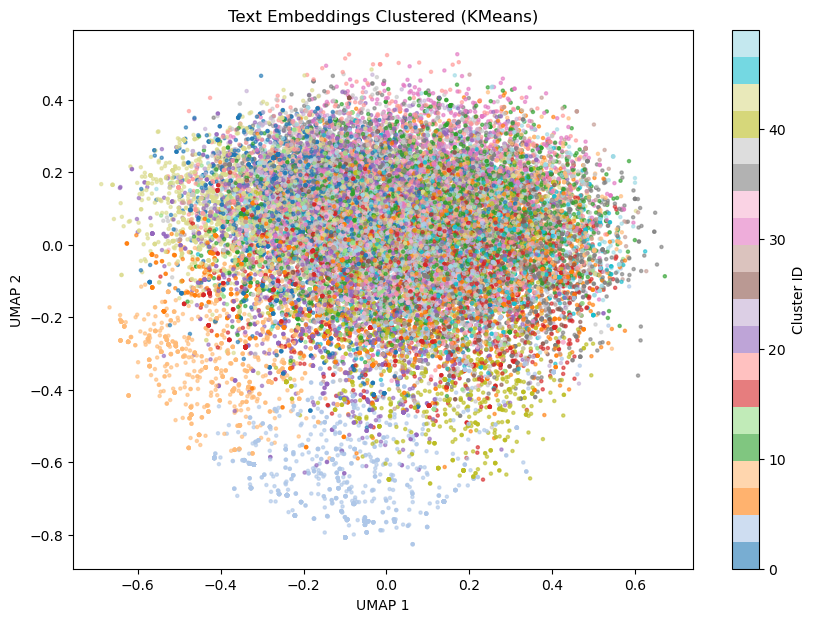

In [48]:
from sklearn.cluster import KMeans

clusters = [3, 4, 5, 10, 15, 20, 50]

for cluster in clusters:

    print("="*100)
    print(f"{cluster} cluster")
    print("="*100)    
    
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    cluster_labels = kmeans.fit_predict(text_embeddings)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(text_embeddings_2d[:, 0], text_embeddings_2d[:, 1], c=cluster_labels, cmap="tab20", s=5, alpha=0.6)
    plt.title("Text Embeddings Clustered (KMeans)")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.colorbar(label='Cluster ID')
    plt.show()


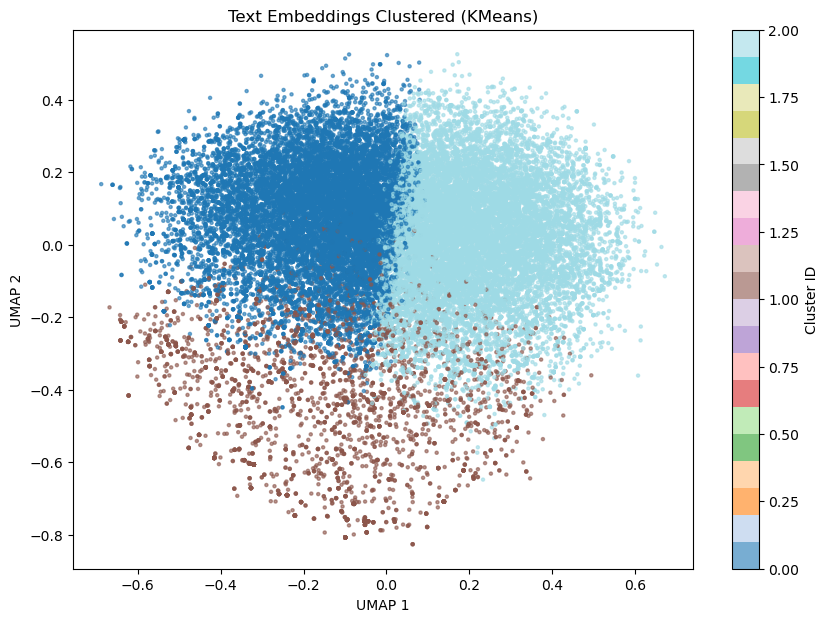

In [49]:
# It seems like 3 clusters is the most logical
    
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(text_embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(text_embeddings_2d[:, 0], text_embeddings_2d[:, 1], c=cluster_labels, cmap="tab20", s=5, alpha=0.6)
plt.title("Text Embeddings Clustered (KMeans)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label='Cluster ID')
plt.show()

In [50]:
import pandas as pd

annotations["text_cluster"] = cluster_labels

for cluster_id in range(3):
    print(f"\nCluster {cluster_id}:")
    texts = annotations[annotations["text_cluster"] == cluster_id]["text"].sample(10, random_state=42).to_list()
    for text in texts:
        print("-", text)



Cluster 0:
- male voice saying names 
- Power tools humming quietly in a steady pattern outside.
- Man speaks happily nearby on mid-volume.
- A woman voice saying "This is a sound of a sink"
- metalic click of door locking
- A stream of water flows steady.
- A crowd of people murmuring in the background.
- a mal speaking loudly indoor
- percussion sound
- snoring

Cluster 1:
- High pitched birds chirping in nature arrhythmically.
- Repeated high-pitched small dog barks.
- A bird sings loudly in the outside 
- A bird is tweeting in the background.
- a bird chirping
- birds are singing
- a high-pitched chirring sound with high intensity from near to medium distance in an unpredictable pattern
- a bird chirping multiple times outdoors
- A bird is singing rhythmically and closely
- A bird chirping loudly and in a high pitch outdoors.

Cluster 2:
- bongos being played fast repeatedly
- dogs barking outside
- Something very heavy made out of wood falling over loudly;
- Several motors are he

It seems like the first cluster has to do with human noises, the second one for some reason only birds and the third one if I had to guess would be loud sounds.

However its very funny how the birds have a monopoly

## 4.b) Design a labeling function for classes dog and cat. Do the annotations labeled as dog or cat sounds form tight clusters in the text and audio feature space?

In [52]:
# This function seems a bit too easy but hopefully its good enough idk
def label_dog_cat(text):
    text = text.lower()
    if "dog" in text:
        return "dog"
    elif "cat" in text:
        return "cat"
    else:
        return "other"

annotations["animal_label"] = annotations["text"].apply(label_dog_cat)

annotations["animal_label"].value_counts()


animal_label
other    33368
dog       1606
cat        852
Name: count, dtype: int64

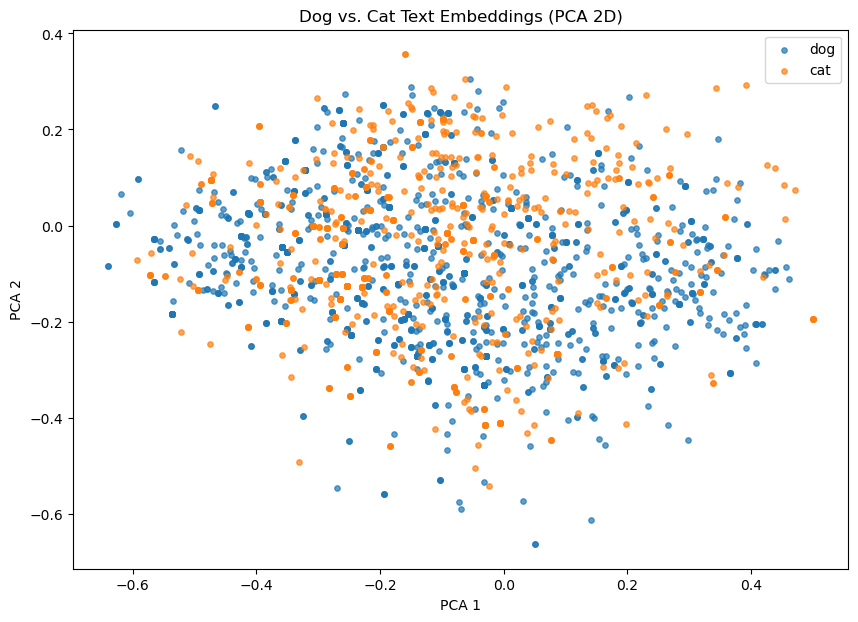

In [53]:
mask = annotations["animal_label"].isin(["dog", "cat"])

animal_embeddings_2d = text_embeddings_2d[mask.values]
animal_labels = annotations[mask]["animal_label"].values

plt.figure(figsize=(10, 7))
for label in ["dog", "cat"]:
    idx = animal_labels == label
    plt.scatter(animal_embeddings_2d[idx, 0], animal_embeddings_2d[idx, 1], s=15, alpha=0.7, label=label)

plt.title("Dog vs. Cat Text Embeddings (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


The dog and cat annotations are scattered, with no obvious tight clusters.
There may be weak local groupings, but overall, text descriptions are highly varied — even for similar sound types.

In [55]:
import os

audio_files = os.listdir("audio_features")
audio_files[:10]

['434996.npz',
 '405593.npz',
 '272540.npz',
 '478550.npz',
 '467470.npz',
 '262753.npz',
 '147543.npz',
 '336316.npz',
 '517183.npz',
 '709305.npz']

In [74]:
import numpy as np
import os
from tqdm import tqdm

audio_files = os.listdir("audio_features")

filenames = []
audio_embeddings = []

for fname in tqdm(audio_files):
    try:
        data = np.load(os.path.join("audio_features", fname))
        emb = data["embeddings"]
        mean_embedding = np.mean(emb, axis=0) 
        filenames.append(fname.replace(".npz", ""))
        audio_embeddings.append(mean_embedding)
    except Exception as e:
        print(f"Error with {fname}: {e}")

audio_embeddings = np.vstack(audio_embeddings)
annotations["filename"] = annotations["filename"].str.replace(".mp3", "", regex=False)


100%|██████████████████████████████████████████████████████████████| 9026/9026 [00:10<00:00, 855.75it/s]


In [72]:
audio_feature_cols = audio_df.columns[:-1]

merged = annotations.merge(audio_df, on="filename", how="inner")
merged_animals = merged[merged["animal_label"].isin(["dog", "cat"])]

X_audio = merged_animals[audio_feature_cols].values
y_audio = merged_animals["animal_label"].values

print("X_audio shape:", X_audio.shape)
print("y_audio shape:", y_audio.shape)

X_audio shape: (2458, 768)
y_audio shape: (2458,)


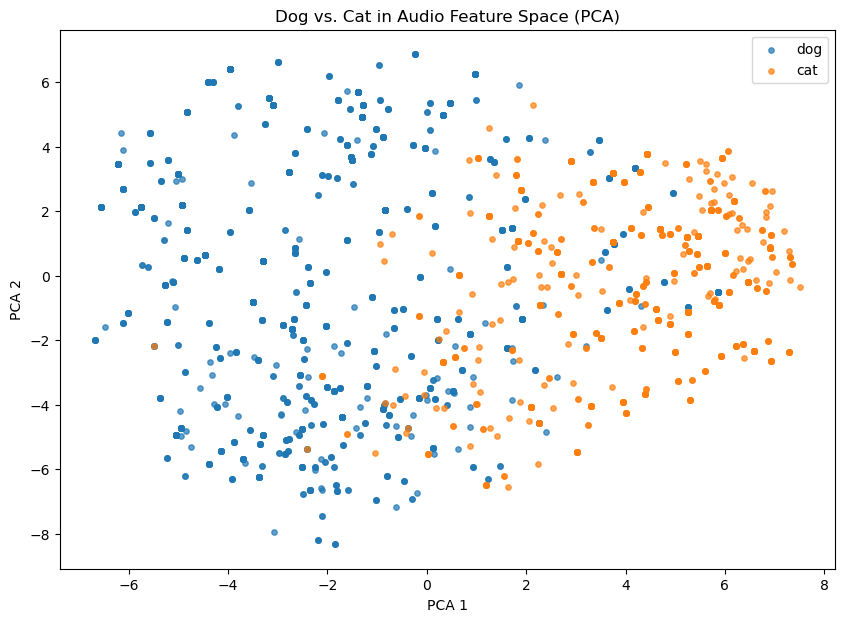

In [75]:
pca = PCA(n_components=2)
X_audio_2d = pca.fit_transform(X_audio)

plt.figure(figsize=(10, 7))
for label in ["dog", "cat"]:
    idx = y_audio == label
    plt.scatter(X_audio_2d[idx, 0], X_audio_2d[idx, 1], s=15, alpha=0.7, label=label)

plt.title("Dog vs. Cat in Audio Feature Space (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

There’s a clear separation. Damn... I didnt think that the audios were better at distinguishing cats and dogs then text, but logically id does kinda make sense. bc in a sentence dogs and cats can be used interchangebly often, but in audios they are very distinct.